# Labor Parktikum 2

In [34]:
# Vorbereitung zur Datenverarbeitung

import pandas as pd
import numpy as np
import scipy.signal as sc 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from scipy.signal import butter, filtfilt, find_peaks
import neurokit2 as nk
import os
from Lab2Functions import decg_peaks, d_ecg_peaks, Rwave_peaks

#Daten Einlesen:
dataBTOM = pd.read_csv('data/BelastungEKGTOM.csv', sep='\t')
dataRTOM = pd.read_csv('data/RuheEKGTOM.csv', sep='\t')
dataRGEORG = pd.read_csv('data/RuheEKGGEORG.csv', sep='\t')
dataALEX = pd.read_csv('data/RuheEKGALEX.csv', sep='\t')
dataRAMELIE = pd.read_csv('data/RuheEKGAMELIE.csv', sep='\t')

#Spalten benennen:
dataBTOM.columns = ['EKG', 'Time']
dataRTOM.columns = ['EKG', 'Time']
dataRGEORG.columns = ['EKG', 'Time']
dataRAMELIE.columns = ['EKG', 'Time']
dataALEX.columns = ['EKG', 'Time']

# Filtern der Daten
Wn = 0.10 
b, a = sc.butter(4, Wn, 'low', analog=False)

#Ruhe EKG TOM:
fdataRTOM = filtfilt(b, a, dataRTOM['EKG'])

#Ruhe EKG GEORG:
fdataRGEORG = filtfilt(b, a, dataRGEORG['EKG'])

#Ruhe EKG AMELIE:
fdataRAMELIE = filtfilt(b, a, dataRAMELIE['EKG'])

#Ruhe EKG ALEX:
fdataALEX = filtfilt(b, a, dataALEX['EKG'])

## Aufgabe 3

Führen Sie Aufgabe 1 Teil 4: Experiment in Ruhe für jeden Teilnehmer Ihrer Gruppe aus und plotten Sie 5 Sekunden der gefilterten Daten. Markieren Sie für einen Teilnehmer die P-Welle, den QRS-Komplex und die T-Welle im Plot. Beschreiben Sie das physiologische Phänomen, welches für die jeweiligen elektrischen Signale des EKGs verantwortlich ist.

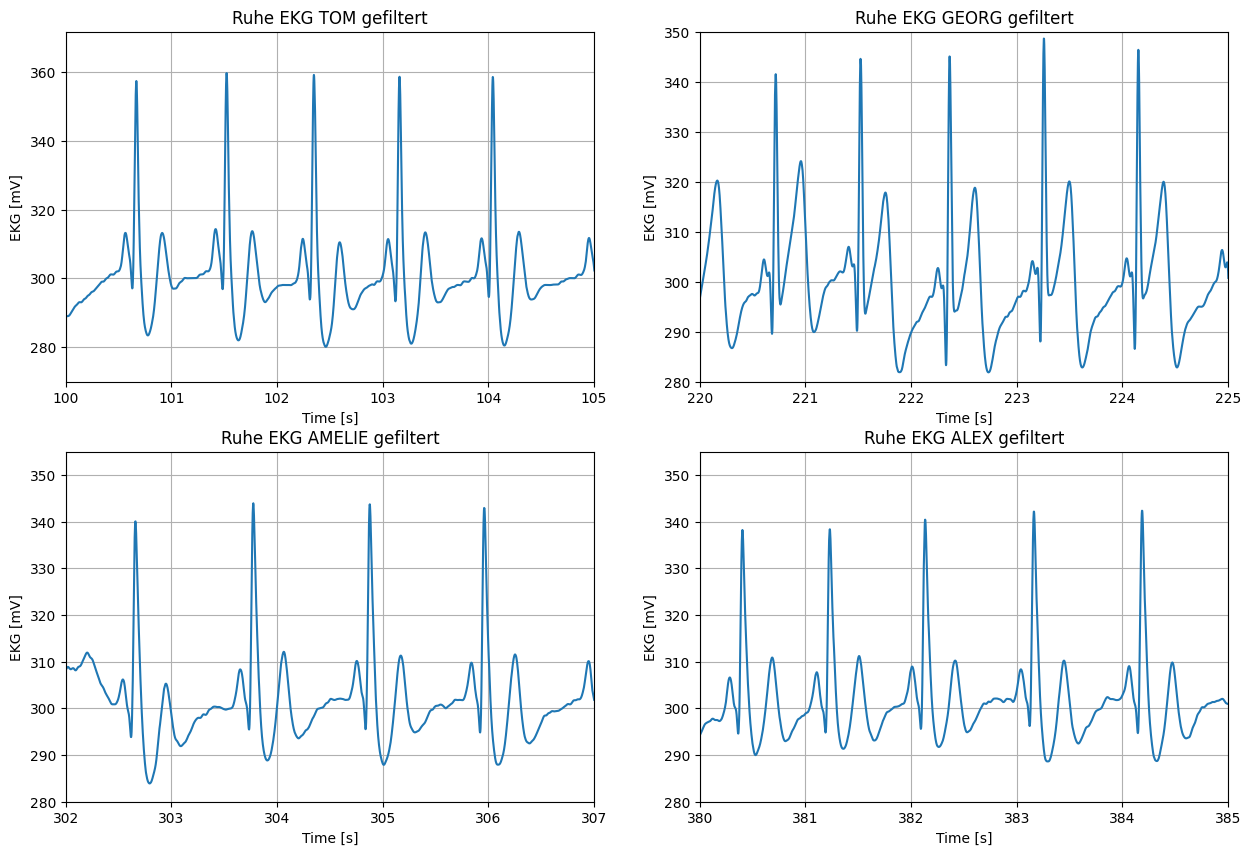

In [35]:
# Plot der gefilterten Daten für 5 Sekunden im Format 2x2

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Ruhe EKG TOM
axs[0, 0].plot(dataRTOM['Time']/1000, fdataRTOM)
axs[0, 0].set_xlim(100, 105)
axs[0, 0].set_title('Ruhe EKG TOM gefiltert')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('EKG [mV]')
axs[0, 0].grid()

# Ruhe EKG GEORG
axs[0, 1].plot(dataRGEORG['Time']/1000, fdataRGEORG)
axs[0, 1].set_xlim(220, 225)
axs[0, 1].set_ylim(280, 350)
axs[0, 1].set_title('Ruhe EKG GEORG gefiltert')
axs[0, 1].set_xlabel('Time [s]')
axs[0, 1].set_ylabel('EKG [mV]')
axs[0, 1].grid()

# Ruhe EKG AMELIE
axs[1, 0].plot(dataRAMELIE['Time']/1000, fdataRAMELIE)
axs[1, 0].set_xlim(302, 307)
axs[1, 0].set_ylim(280, 355)
axs[1, 0].set_title('Ruhe EKG AMELIE gefiltert')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('EKG [mV]')
axs[1, 0].grid()

# Ruhe EKG ALEX
axs[1, 1].plot(dataALEX['Time']/1000, fdataALEX)
axs[1, 1].set_xlim(380, 385)
axs[1, 1].set_ylim(280, 355)
axs[1, 1].set_title('Ruhe EKG ALEX gefiltert')
axs[1, 1].set_xlabel('Time [s]')
axs[1, 1].set_ylabel('EKG [mV]')
axs[1, 1].grid()

plt.show()

## Aufgabe 5

Plotten Sie etwa 5 Sekunden des EKG-Signals vom Experiment in Ruhe von einem der Teilnehmer (gefiltert). Nutzen Sie die Ergebnisse der PeakSuche-Funktion, um die R-Zacken im Plot zu labeln.

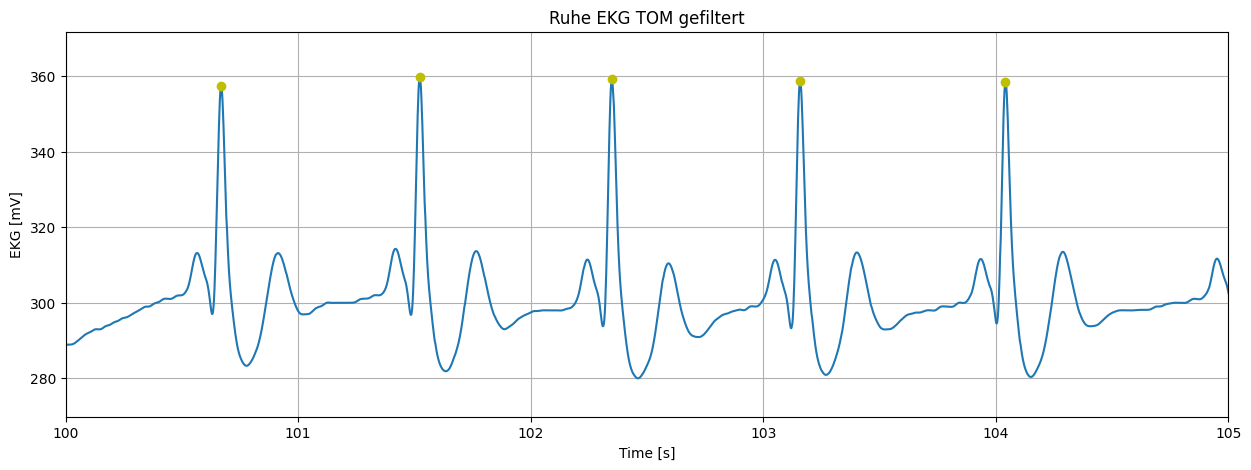

In [37]:
# Erkennen aller Peaks
peaks_all, _ = sc.find_peaks(fdataRTOM, height=0.0, distance=1)

# Herausfiltern der R Peaks aus den Peaks
rpeaks = nk.ecg_peaks(fdataRTOM, sampling_rate=500)
waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=500, method="peak")
# Plot der gefilterten Daten für 5 Sekunden im Format 1x1
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Ruhe EKG TOM
ax.plot(dataRTOM['Time']/1000, fdataRTOM)
ax.set_xlim(100, 105)
ax.set_title('Ruhe EKG TOM gefiltert')
ax.set_xlabel('Time [s]')
ax.set_ylabel('EKG [mV]')
ax.grid()

# Markieren der R Peaks
ax.plot(dataRTOM['Time'][r_peaks]/1000, fdataRTOM[r_peaks], 'yo')

plt.show()